<a href="https://colab.research.google.com/github/Mrugank-Dake/hello-world/blob/master/MD_Version_VGGish_Audio_Embedding_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGGish Audio Embedding Colab

This colab demonstrates how to extract the AudioSet embeddings, using a VGGish deep neural network (DNN).

#Importing and Testing the VGGish System

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My\ Drive/Sciurid\ Lab/VGGish_Audioset/

/content/gdrive/My Drive/Sciurid Lab/VGGish_Audioset


In [3]:
!pip install numpy scipy
!pip install resampy tensorflow six

Based on the directions at: https://github.com/tensorflow/models/tree/master/research/audioset

In [4]:
!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


# New Section

In [5]:
# Check to see where are in the kernel's file system.
!pwd

/content/gdrive/My Drive/Sciurid Lab/VGGish_Audioset


In [6]:
# Grab the VGGish model
!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt
!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  277M  100  277M    0     0  40.9M      0  0:00:06  0:00:06 --:--:-- 35.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 73020  100 73020    0     0  3395k      0 --:--:-- --:--:-- --:--:-- 3395k


In [7]:
# Make sure we got the model data.
!ls

 features.py					  vggish_params.pyc
 inference.py					  vggish_pca_params.npz
'MD Version VGGish Audio Embedding Colab.ipynb'   vggish_postprocess.py
 mel_features.py				  vggish_postprocess.pyc
 mel_features.pyc				  vggish_slim.py
 models						  vggish_slim.pyc
 params.py					  vggish_smoke_test.py
 Readings.gdoc					  vggish_smoke_test.pyc
 README.md					  vggish_train_demo.py
 vggish_inference_demo.py			  yamnet_class_map.csv
 vggish_input.py				  yamnet.py
 vggish_input.pyc				  yamnet_test.py
 vggish_model.ckpt				  yamnet_visualization.ipynb
 vggish_params.py


In [8]:
# Verify the location of the AudioSet source files
!ls models/research/audioset

README.md  vggish  yamnet


In [9]:
# Copy the source files to the current directory.
!cp models/research/audioset/*/*.py .

In [10]:
# Make sure the source files got copied correctly.
!ls

 features.py					  vggish_params.pyc
 inference.py					  vggish_pca_params.npz
'MD Version VGGish Audio Embedding Colab.ipynb'   vggish_postprocess.py
 mel_features.py				  vggish_postprocess.pyc
 mel_features.pyc				  vggish_slim.py
 models						  vggish_slim.pyc
 params.py					  vggish_smoke_test.py
 Readings.gdoc					  vggish_smoke_test.pyc
 README.md					  vggish_train_demo.py
 vggish_inference_demo.py			  yamnet_class_map.csv
 vggish_input.py				  yamnet.py
 vggish_input.pyc				  yamnet_test.py
 vggish_model.ckpt				  yamnet_visualization.ipynb
 vggish_params.py


In [11]:
# Run the test, which also loads all the necessary functions.
from vggish_smoke_test import *

W0802 10:02:03.729207 140650042328960 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/compat/v2_compat.py:68: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term



Testing your install of VGGish



W0802 10:02:05.118129 140650042328960 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tf_slim/layers/layers.py:1089: apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
W0802 10:02:05.239644 140650042328960 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tf_slim/layers/layers.py:1666: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


Log Mel Spectrogram example:  [[-4.47297436 -4.29457354 -4.14940631 ... -3.9747003  -3.94774997
  -3.78687669]
 [-4.48589533 -4.28825497 -4.139964   ... -3.98368686 -3.94976505
  -3.7951698 ]
 [-4.46158065 -4.29329706 -4.14905953 ... -3.96442484 -3.94895483
  -3.78619839]
 ...
 [-4.46152626 -4.29365061 -4.14848608 ... -3.96638113 -3.95057575
  -3.78538167]
 [-4.46152595 -4.2936572  -4.14848104 ... -3.96640507 -3.95059567
  -3.78537143]
 [-4.46152565 -4.29366386 -4.14847603 ... -3.96642906 -3.95061564
  -3.78536116]]
VGGish embedding:  [0.         0.         0.         0.         0.         0.
 0.         0.16137294 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.80695784
 0.         0.         0.         0.         0.         0.
 0.         0.36792755 0.03582418 0.         0.         0.
 0.         0.38027036 0.13755938 0.9174708  0.80656356 0.
 0.         0.         0.         0.04036269 0.7076244  0.
 0.4978391  0.24081807 0.21565425 0.88

#Using the VGGish System

In [12]:
import vggish_slim
import vggish_params
import vggish_input

def CreateVGGishNetwork(hop_size=0.96):   # Hop size is in seconds.
  """Define VGGish model, load the checkpoint, and return a dictionary that points
  to the different tensors defined by the model.
  """
  vggish_slim.define_vggish_slim()
  checkpoint_path = 'vggish_model.ckpt'
  vggish_params.EXAMPLE_HOP_SECONDS = hop_size
  
  vggish_slim.load_vggish_slim_checkpoint(sess, checkpoint_path)

  features_tensor = sess.graph.get_tensor_by_name(
      vggish_params.INPUT_TENSOR_NAME)
  embedding_tensor = sess.graph.get_tensor_by_name(
      vggish_params.OUTPUT_TENSOR_NAME)

  layers = {'conv1': 'vggish/conv1/Relu',
            'pool1': 'vggish/pool1/MaxPool',
            'conv2': 'vggish/conv2/Relu',
            'pool2': 'vggish/pool2/MaxPool',
            'conv3': 'vggish/conv3/conv3_2/Relu',
            'pool3': 'vggish/pool3/MaxPool',
            'conv4': 'vggish/conv4/conv4_2/Relu',
            'pool4': 'vggish/pool4/MaxPool',
            'fc1': 'vggish/fc1/fc1_2/Relu',
            'fc2': 'vggish/fc2/Relu',
            'embedding': 'vggish/embedding',
            'features': 'vggish/input_features',
         }
  g = tf.get_default_graph()
  for k in layers:
    layers[k] = g.get_tensor_by_name( layers[k] + ':0')
    
  return {'features': features_tensor,
          'embedding': embedding_tensor,
          'layers': layers,
         }

In [13]:
def ProcessWithVGGish(vgg, x, sr):
  '''Run the VGGish model, starting with a sound (x) at sample rate
  (sr). Return a whitened version of the embeddings. Sound must be scaled to be
  floats between -1 and +1.'''

  # Produce a batch of log mel spectrogram examples.
  input_batch = vggish_input.waveform_to_examples(x, sr)
  # print('Log Mel Spectrogram example: ', input_batch[0])

  [embedding_batch] = sess.run([vgg['embedding']],
                               feed_dict={vgg['features']: input_batch})

  # Postprocess the results to produce whitened quantized embeddings.
  pca_params_path = 'vggish_pca_params.npz'

  pproc = vggish_postprocess.Postprocessor(pca_params_path)
  postprocessed_batch = pproc.postprocess(embedding_batch)
  # print('Postprocessed VGGish embedding: ', postprocessed_batch[0])
  return postprocessed_batch[0]


In [14]:
# Test these new functions with the original test.
import tensorflow as tf
tf.reset_default_graph()
sess = tf.Session()

vgg = CreateVGGishNetwork(0.01)

# Generate a 1 kHz sine wave at 44.1 kHz (we use a high sampling rate
# to test resampling to 16 kHz during feature extraction).
num_secs = 3
freq = 1000
sr = 44100
t = np.linspace(0, num_secs, int(num_secs * sr))
x = np.sin(2 * np.pi * freq * t)  # Unit amplitude input signal

postprocessed_batch = ProcessWithVGGish(vgg, x, sr)

# print('Postprocessed VGGish embedding: ', postprocessed_batch[0])
expected_postprocessed_mean = 123.0
expected_postprocessed_std = 75.0
np.testing.assert_allclose(
    [np.mean(postprocessed_batch), np.std(postprocessed_batch)],
    [expected_postprocessed_mean, expected_postprocessed_std],
    rtol=rel_error)


In [15]:
def EmbeddingsFromVGGish(vgg, x, sr):
  '''Run the VGGish model, starting with a sound (x) at sample rate
  (sr). Return a dictionary of embeddings from the different layers
  of the model.'''
  # Produce a batch of log mel spectrogram examples.
  input_batch = vggish_input.waveform_to_examples(x, sr)
  # print('Log Mel Spectrogram example: ', input_batch[0])

  layer_names = vgg['layers'].keys()
  tensors = [vgg['layers'][k] for k in layer_names]
  
  results = sess.run(tensors,
                     feed_dict={vgg['features']: input_batch})

  resdict = {}
  for i, k in enumerate(layer_names):
    resdict[k] = results[i]
    
  return resdict

In [16]:
resdict = EmbeddingsFromVGGish(vgg, x, sr)

In [17]:
for k in resdict:
  print k, resdict[k].shape

fc1 (203, 4096)
fc2 (203, 128)
features (203, 96, 64)
conv3 (203, 24, 16, 256)
conv2 (203, 48, 32, 128)
conv1 (203, 96, 64, 64)
embedding (203, 128)
conv4 (203, 12, 8, 512)
pool3 (203, 12, 8, 256)
pool2 (203, 24, 16, 128)
pool1 (203, 48, 32, 64)
pool4 (203, 6, 4, 512)


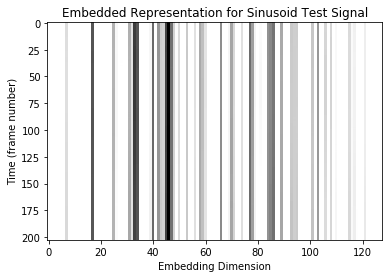

In [18]:
import matplotlib.pyplot as plt
plt.imshow(resdict['embedding'], 
           aspect='auto', cmap='binary')
plt.xlabel('Embedding Dimension')
plt.ylabel('Time (frame number)')
plt.title('Embedded Representation for Sinusoid Test Signal')
plt.grid(False);

#Showing the graph

In [19]:
# Note : Tested with Chrome 66 -- might not work with all browsers :-(

# Let's visualize our graph!
# Tip: to make your graph more readable you can add a
# name="..." parameter to the individual Ops.

# src: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb

import numpy as np
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [20]:
show_graph(tf.get_default_graph())